# パターン認識問題を解いてみる

## パターン識別編（2次元のロジスティック回帰）

解説付きでコードを示しています．使い方としては

1. 上から順に読んで（重要），
2. セルを実行していってください．
3. 理解できない場合は，スタッフに質問を投げるなどしてください．
4. 理解が進んだら，自分のノートを作成し，ページにコードを真似して記述していってください．

In [1]:
import numpy as np
import matplotlib.pylab as plt

それでは，　次に２次元データの識別を考えてみよう

In [2]:
# [-1, 1] x [-1, 1] で定義された２次元空間に点を N 点ばらまき
# 適当な直線の上下で暮らすを分割してデータを作る

N = 500 # 点の個数
true_w１ = np.array([1, np.random.rand()]) #適当に傾き決める． わからなければ適当に数値を当て込んでもOK
true_w0 = 0.0 # 面倒なので 0 に設定しておく

# 点をばらまく
x = np.random.uniform(low=-1, high=1, size=(N, 2))

# ラベルの設定，直線  true_w1[0] * x[1] + true_w1[1] * x[0] + true_w0 = 0 より大きければクラス1
# そうでなければ クラス 0 のラベルを貼り付ける
y = np.zeros(N)
y[x @ true_w1 + true_w0 > 0] = 1

### これで下準備完了
(x, y) にデータが入っている．これのプロットと真の直線の関係を見てみる

(-1.0, 1.0)

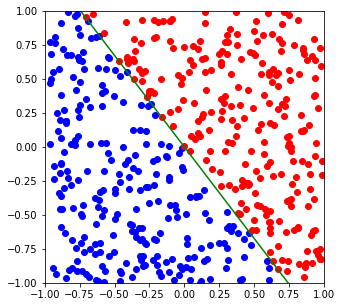

In [3]:
plt.figure(figsize=(5,5))
plt.plot(x[y==0, 0], x[y==0, 1], 'bo')
plt.plot(x[y==1, 0], x[y==1, 1], 'ro' )

xx = np.linspace(-1, 1, 128)
yy = -true_w1[0]/true_w1[1] * xx - true_w0 / true_w1[1]
plt.plot(xx, yy, 'g-')
plt.xlim(-1, 1)
plt.ylim(-1,1)

## 問い: 赤点と青点の境界を決めてクラスを判別することは可能か？

２次元のデータ上でクラス境界を求めます．
データの点群を $\{x_n\}$ とすると， 0 のラベルが付いたクラスと 1 のラベルのついたクラスが，上図のように散らばっているので
ロジスティック関数を適当にパラメータを変えつつ貼り付けてフィッティングする方針は変わりません

前述の例との違いは $x$ が２変数からなるので， $f(x; w) = \sigma( w_1 x + w_0)$ の $w_1$ がベクトルになり $w_1 x$ の演算が内積になることのみ
ロス関数も交差エントロピー関数で
$$
    J(w) = - \sum_n y_n \log f(x_n, w) + (1-y_n) \log (1-f(x_n, w))
$$
を使う．あとは

## モデル $f(x_n; w)$ のロスが小さくなるように $w$ を求める.


scikit-learn については割愛します．（入力の次元が増えただけなので前のノートブックとほぼ同じになります．）
それを言ったら Keras + TensorFlow についても同じことがいえるけど

## Keras + TensorFlow を用いた解法

計算に結構時間かかります．

あとで表示するロスの値が収束していなさそうであれば， epochs パラメータ増やして再度実験してください．

In [4]:
# いつものインポート
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [5]:
# モデル構築
model = Sequential()   # 階層型のモデルを選択
model.add(Dense(1, input_shape=(2,), use_bias=True)) # 入力が２次元になるところだけが違う
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',  optimizer='adam') #最適化手法を指定 ここも adam を指定しておこう

In [6]:
# 学習によるパラメータフィット (時間かかります)
# verbose=0 指定をしてログの生成を抑制しておきます．
hist = model.fit(x, y, epochs=4096, batch_size=100, verbose=0)

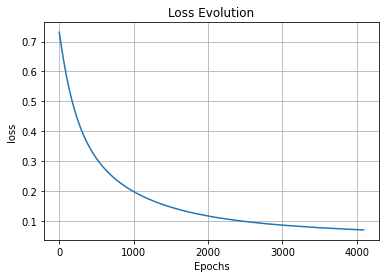

In [7]:
# ロスの値が学習によってどう変わるかを表示

plt.plot(hist.history['loss'])
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()

かなり頑張ってる．収束しているかは，生成データ次第かも

とりあえず，パラメータを取り出して確認してみる

In [8]:
# 結合とバイアスを取り出す．

w1, w0 = model.get_weights()

w0 = float(w0)

print( "w1, w0 = (%.3f, %.3f)" % (w1[1]/w1[0], w0))

w1, w0 = (0.713, 0.187)


推定直線とデータ，真の直線を重ねて見る

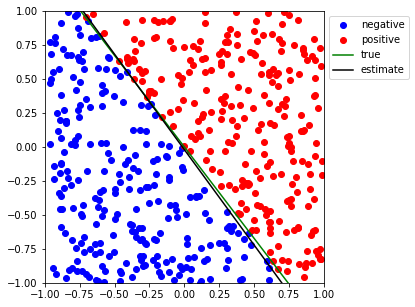

In [9]:
plt.figure(figsize=(5,5))
plt.plot(x[y==0, 0], x[y==0, 1], 'bo', label='negative')
plt.plot(x[y==1, 0], x[y==1, 1], 'ro', label='positive' )

xx = np.linspace(-1, 1, 128)
yy = -true_w1[0]/true_w1[1] * xx - true_w0 / true_w1[1]
plt.plot(xx, yy, 'g-', label='true')

yy = - w1[0]/w1[1] * xx - w0 / w1[1]
plt.plot(xx, yy, 'k-', label='estimate')

plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

推定した識別境界は黒線．
うん，大体あってそう

微妙にずれるのはしかたがないところ